<a href="https://colab.research.google.com/github/Kaivan-Khazeni/WaterQualityPrediction/blob/main/WaterQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import requests  # Import the requests library
import opendatasets as od
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


# Water Quality Prediction:

Will use a ML model to predict if a water is drinkable

Date : April 10th, 2022

Kaivan Khazeni

# 1. Read data into pandas DF and begin cleaning process


In [40]:
water_df = pd.read_csv("water_potability.csv")

In [41]:
print("shape of dataframe")
water_df.shape

shape of dataframe


(3276, 10)

In [42]:
print("Name of Variables")
print(water_df.columns)

Name of Variables
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [43]:
print("Null value count for each column in the dataframe")
print(water_df.isna().sum())

Null value count for each column in the dataframe
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Since there are a good amount of column values with NULL or missing values, there are two approaches:


1.   Remove rows with missing data
2.   Fill missing data with average, median, mode

To decide this, I will plot the columns via density plot and observe for symmetric or skewed data.



I will do this for PH, Sulfate, and Trihalomethanes 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


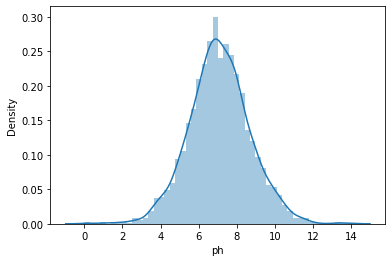

In [44]:
import seaborn as sns
# Distribution plot
sns.distplot(water_df['ph'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


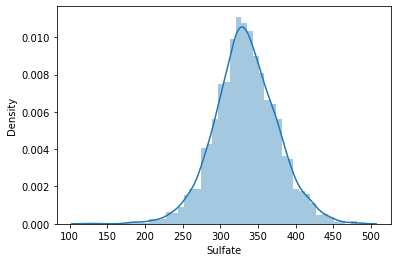

In [45]:
sns.distplot(water_df['Sulfate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


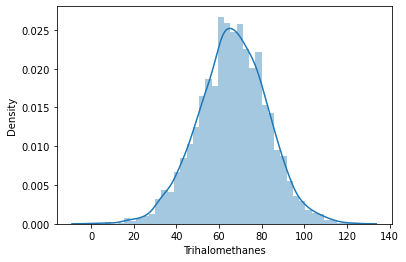

In [46]:
sns.distplot(water_df['Trihalomethanes'])

Since all three variables showed symmetric density plot, I will fill the na columns with average of the column type in order to fill any NA/NULL rows.

In [52]:
water_df = water_df.fillna(water_df.mean())


In [53]:
print("Checking for null values again, results below")
print(water_df.isna().sum())

Checking for null values again, results below
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
